In [1]:
import py4DSTEM
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import pandas as pd
import seaborn as sns
import re
import h5py

from functools import reduce
from ttt.utils import listfiles
from mlr.database.utils import read_metadata, write_metadata

In [2]:
final_data_folder = pathlib.Path("/media/files/simulated_databases/defected_Au_np_processed_images_10_18_2021/dataset/img_55100625932_20211018")

In [3]:
pimg_meta = read_metadata(final_data_folder.joinpath("metadata.json"))
print(pimg_meta)

{'C1': 99.49719291563545, 'E0': 300, 'N_defects': 3, 'applied_aberrations': [[2.0, 2.0, 2556.3605344804437, -1.1955505376161157], [3.0, 3.0, 19127.491639599823, -2.9792770331543204], [3.0, 1.0, 76275.92606002821, 0.5096361415823443], [4.0, 0.0, -1526316.3865359204, 0.0], [4.0, 4.0, 126302.08258684589, 1.556833692778942], [4.0, 2.0, 136083.9115983098, -0.6021385919380436], [5.0, 5.0, 1989557.0002435814, -0.10995574287564276], [5.0, 3.0, 1349860.4889685998, -0.22165681500327983], [5.0, 1.0, 4284217.704727275, 1.8238690683340744], [6.0, 0.0, 557441914.3020195, 0.0], [6.0, 6.0, 2564339.187834003, 1.0506882097005865], [2.0, 0.0, 15877.072238521701, 0.0]], 'defect_types': ['twin'], 'dose': 400, 'focal_spread': 15, 'mask_guassian_filter_size': 5.0, 'median_filter_size': 3, 'numFP': 8, 'orientation': [-0.17591050426378024, 0.43984022156883, -0.8806793252824465], 'particle_ID': '69898359154_20211011', 'position': [89.21982386614854, 84.48190076858064], 'potential_parameterization': '2D', 'poten

In [4]:
pid = pimg_meta["particle_ID"]
structure_folder = pathlib.Path("/media/files/simulated_databases/defected_Au_np_structures_10_11_2021/structures/particle_"+pid)
print(read_metadata(structure_folder.joinpath("metadata.json")))

{'N_defects': 3, 'defect_types': ['twin'], 'orientation': [-0.17591050426378024, 0.43984022156883, -0.8806793252824465], 'position': [89.21982386614854, 84.48190076858064], 'radius': 18.19712477616501}


In [5]:
## have to find the folder that corresponds to the simulation for this particle

f_list = [x for x in listfiles("/media/files/simulated_databases/defected_Au_np_sims_10_12_2021/simulations/") if x.is_dir()]

In [6]:
for f in f_list:
    meta_temp = read_metadata(f.joinpath("metadata.json"))
    if meta_temp["particle_ID"] == pid:
        print(f)
        break

sim_folder = pathlib.Path(f)
print(sim_folder)

/media/files/simulated_databases/defected_Au_np_sims_10_12_2021/simulations/simulation_41579287067_20211012
/media/files/simulated_databases/defected_Au_np_sims_10_12_2021/simulations/simulation_41579287067_20211012


In [7]:
def get_stack_from_file(folder):
        sim_data = np.zeros((8, 640, 640), dtype=np.complex64)
        for i in range(8):
            sim_data[i,:,:] = np.squeeze(py4DSTEM.io.read(folder.joinpath("particle_on_substrate.h5"), data_id="HRTEM_virtual_fp000%i" % i).data)

        # load mask data
        mask_data = np.zeros((8, 640, 640), dtype=np.complex64)
        for i in range(8):
            mask_data[i,:,:] = np.squeeze(py4DSTEM.io.read(folder.joinpath("particle.h5"), data_id="HRTEM_virtual_fp000%i" % i).data)

        return sim_data, mask_data


In [8]:
sim_data, mask_data = get_stack_from_file(sim_folder)

# get stack of pngs for all frozen phonons
# convert structure files to standard xyz for viz
# save final images as pngs

In [9]:
# fig = plt.figure(figsize=(6,6))

# ax = fig.gca()

# for i in range(8):
#     ax.imshow(np.abs(sim_data[i,:,:])**2.0, vmin=0.8, vmax=2.5)
#     ax.set_xticks([])
#     ax.set_yticks([])

#     plt.setp(ax.spines.values(), linewidth=1.5)
#     plt.savefig("groupmeeting_viz_12_3_2021/full_np_fp_%i.png" % i, bbox_inches="tight", dpi=300)

In [10]:
# fig = plt.figure(figsize=(6,6))

# ax = fig.gca()

# for i in range(8):
#     ax.matshow(np.angle(mask_data[0,:,:]))
#     ax.set_xticks([])
#     ax.set_yticks([])

#     plt.setp(ax.spines.values(), linewidth=1.5)
#     plt.savefig("groupmeeting_viz_12_3_2021/mask_np_fp_%i.png" % i, bbox_inches="tight", dpi=300)

In [11]:
from ase import Atoms
from ase.io import read, write

In [12]:
sfile_full = read(structure_folder.joinpath("particle_on_substrate.xyz"), format="prismatic")
sfile_mask = read(structure_folder.joinpath("particle.xyz"), format="prismatic")

write("groupmeeting_viz_12_3_2021/sfile_viz_full.xyz", sfile_full)
write("groupmeeting_viz_12_3_2021/sfile_viz_mask.xyz", sfile_mask)

In [13]:
# pimg_data = np.load(final_data_folder.joinpath("train.npy"))
# pimg_mask = np.load(final_data_folder.joinpath("mask.npy"))

# fig = plt.figure(figsize=(4,4))
# ax = fig.gca()

# ax.matshow(pimg_data)
# ax.set_xticks([])
# ax.set_yticks([])
# plt.setp(ax.spines.values(), linewidth=1.25)
# plt.savefig("groupmeeting_viz_12_3_2021/train.png", bbox_inches="tight", dpi=300)

In [14]:
# fig = plt.figure(figsize=(4,4))
# ax = fig.gca()

# ax.matshow(pimg_mask)
# ax.set_xticks([])
# ax.set_yticks([])
# plt.setp(ax.spines.values(), linewidth=1.25)
# plt.savefig("groupmeeting_viz_12_3_2021/mask.png", bbox_inches="tight", dpi=300)

# Visualize performance of networks on experimental data
## Synthetic training

In [5]:
def read_training_history(path):
    history_file = h5py.File(path,'r')
    history_dict = {x:np.array(y) for x, y in history_file.items()} 
    history_file.close()
    return history_dict

In [56]:
root_dir_base = pathlib.Path("/media/files/segmentation_networks/")
root_dirs = [root_dir_base.joinpath("small_NP_networks_11_29_2021"),
            root_dir_base.joinpath("baseline_small_datasets_9_30_2021"),
            root_dir_base.joinpath("baseline_small_datasets_HQ_10_7_2021"),
            root_dir_base.joinpath("substrate_networks_11_29_2021"),
            root_dir_base.joinpath("large_sim_datasets_11_12_2021")
            ]

root_dirs = [folder.joinpath("trained_models") for folder in root_dirs]
model_folders = [[x for x in listfiles(r) if x.is_dir()] for r in root_dirs]
model_folders = reduce(lambda x,y: x+y, model_folders)


In [57]:
## load all the god dan' metadata from the networks
metadata_list = []

for folder in model_folders:
    model_metadata = read_metadata(folder.joinpath("metadata.json"))    
    model_id = re.search("[0-9]+_[0-9]+", str(folder).rsplit("/")[-1])[0]
    model_metadata["ID"] = model_id
    metadata_list.append(model_metadata)
        
df = pd.DataFrame(metadata_list)
df = pd.concat([df, pd.DataFrame(df['schedule'].to_list(), columns = ['schedule_rate', 'schedule_timing'])], axis=1)

(0.2, 1.0)

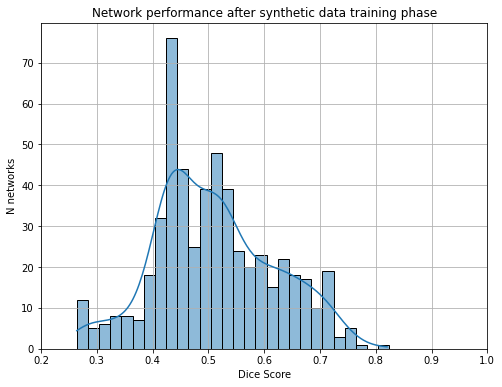

In [58]:
fig = plt.figure(figsize=(8,6))
ax = sns.histplot(data=df, x="exp_f1-score", binwidth=0.02, kde=True)

ax.set_title("Network performance after synthetic data training phase")
ax.set_ylabel("N networks")
ax.set_xlabel("Dice Score")
ax.grid()
ax.set_xlim([0.2, 1.0])

## Varying noise
Using baseline datasets

In [97]:
root_dir_base = pathlib.Path("/media/files/segmentation_networks/")
root_dirs = [root_dir_base.joinpath("baseline_small_datasets_9_30_2021"),
            root_dir_base.joinpath("baseline_small_datasets_HQ_10_7_2021"),
            ]

root_dirs = [folder.joinpath("trained_models") for folder in root_dirs]
model_folders = [[x for x in listfiles(r) if x.is_dir()] for r in root_dirs]
model_folders = reduce(lambda x,y: x+y, model_folders)

## load all the god dan' metadata from the networks
metadata_list = []

for folder in model_folders:
    model_metadata = read_metadata(folder.joinpath("metadata.json"))    
    model_id = re.search("[0-9]+_[0-9]+", str(folder).rsplit("/")[-1])[0]
    model_metadata["ID"] = model_id
    metadata_list.append(model_metadata)
        
df = pd.DataFrame(metadata_list)
df = pd.concat([df, pd.DataFrame(df['schedule'].to_list(), columns = ['schedule_rate', 'schedule_timing'])], axis=1)


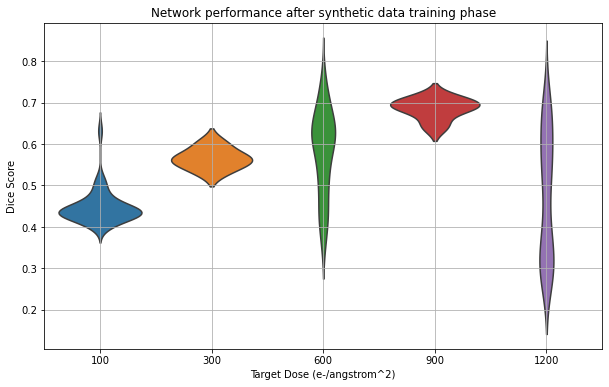

In [99]:
fig = plt.figure(figsize=(10,6))
ax = sns.violinplot(data=df, x="target_dose", y="exp_f1-score", inner=None)

ax.set_title("Network performance after synthetic data training phase")
ax.set_ylabel("Dice Score")
ax.set_xlabel("Target Dose (e-/angstrom^2)")
ax.grid()

# Particle Size

In [100]:
root_dir_base = pathlib.Path("/media/files/segmentation_networks/")
root_dirs = [root_dir_base.joinpath("small_NP_networks_11_29_2021"),
            root_dir_base.joinpath("baseline_small_datasets_9_30_2021"),
            root_dir_base.joinpath("baseline_small_datasets_HQ_10_7_2021"),
            root_dir_base.joinpath("substrate_networks_11_29_2021"),
            root_dir_base.joinpath("large_sim_datasets_11_12_2021")]

root_dirs = [folder.joinpath("trained_models") for folder in root_dirs]
model_folders = [[x for x in listfiles(r) if x.is_dir()] for r in root_dirs]
model_folders = reduce(lambda x,y: x+y, model_folders)

## load all the god dan' metadata from the networks
metadata_list = []

for folder in model_folders:
    model_metadata = read_metadata(folder.joinpath("metadata.json"))    
    model_id = re.search("[0-9]+_[0-9]+", str(folder).rsplit("/")[-1])[0]
    model_metadata["ID"] = model_id

    if "small_NP_networks" in str(folder):
        model_metadata["small_NP"] = True
    else:
        model_metadata["small_NP"] = False

    metadata_list.append(model_metadata)
        
df = pd.DataFrame(metadata_list)
df = pd.concat([df, pd.DataFrame(df['schedule'].to_list(), columns = ['schedule_rate', 'schedule_timing'])], axis=1)

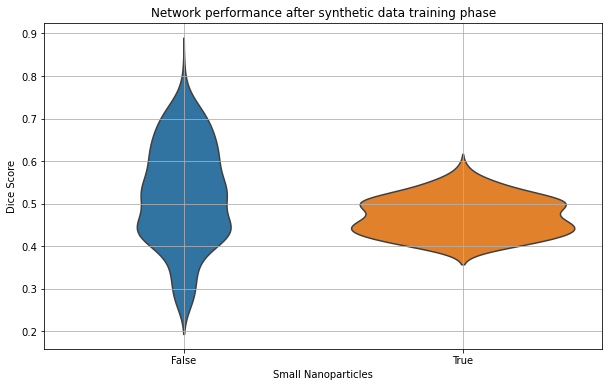

In [101]:
fig = plt.figure(figsize=(10,6))
ax = sns.violinplot(data=df, x="small_NP", y="exp_f1-score", inner=None)

ax.set_title("Network performance after synthetic data training phase")
ax.set_ylabel("Dice Score")
ax.set_xlabel("Small Nanoparticles")
ax.grid()

## Substrate thickness

In [107]:
root_dir_base = pathlib.Path("/media/files/segmentation_networks/")
root_dirs = [root_dir_base.joinpath("substrate_networks_11_29_2021")]

root_dirs = [folder.joinpath("trained_models") for folder in root_dirs]
model_folders = [[x for x in listfiles(r) if x.is_dir()] for r in root_dirs]
model_folders = reduce(lambda x,y: x+y, model_folders)

## load all the god dan' metadata from the networks
metadata_list = []

for folder in model_folders:
    model_metadata = read_metadata(folder.joinpath("metadata.json"))    
    model_id = re.search("[0-9]+_[0-9]+", str(folder).rsplit("/")[-1])[0]
    model_metadata["ID"] = model_id
    metadata_list.append(model_metadata)
        
df = pd.DataFrame(metadata_list)
df = pd.concat([df, pd.DataFrame(df['schedule'].to_list(), columns = ['schedule_rate', 'schedule_timing'])], axis=1)

In [110]:
df["substrate_thicknesses_processed"] = df["substrate_thicknesses"].apply(lambda x: len(x))

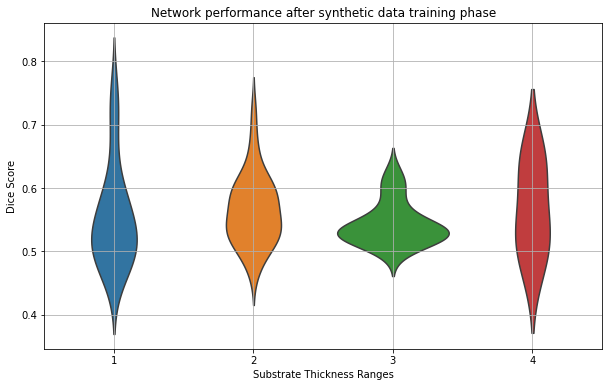

In [112]:
fig = plt.figure(figsize=(10,6))
ax = sns.violinplot(data=df, x="substrate_thicknesses_processed", y="exp_f1-score", inner=None)

ax.set_title("Network performance after synthetic data training phase")
ax.set_ylabel("Dice Score")
ax.set_xlabel("Substrate Thickness Ranges")
ax.grid()

# Defoci and Structure Augmentation

In [126]:
root_dir_base = pathlib.Path("/media/files/segmentation_networks/")
root_dirs = [root_dir_base.joinpath("small_NP_networks_11_29_2021")]

root_dirs = [folder.joinpath("trained_models") for folder in root_dirs]
model_folders = [[x for x in listfiles(r) if x.is_dir()] for r in root_dirs]
model_folders = reduce(lambda x,y: x+y, model_folders)

## load all the god dan' metadata from the networks
metadata_list = []

for folder in model_folders:
    model_metadata = read_metadata(folder.joinpath("metadata.json"))    
    model_id = re.search("[0-9]+_[0-9]+", str(folder).rsplit("/")[-1])[0]
    model_metadata["ID"] = model_id
    metadata_list.append(model_metadata)
        
df = pd.DataFrame(metadata_list)
df = pd.concat([df, pd.DataFrame(df['schedule'].to_list(), columns = ['schedule_rate', 'schedule_timing'])], axis=1)

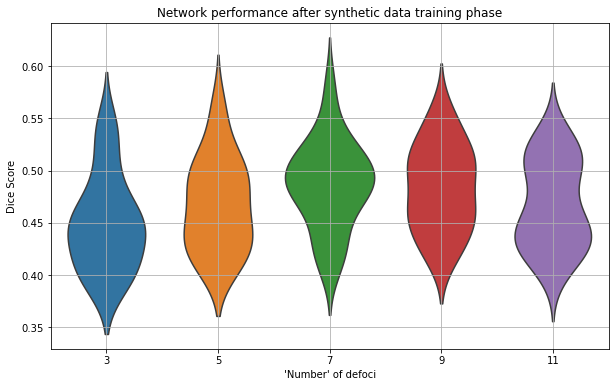

In [128]:
fig = plt.figure(figsize=(10,6))
ax = sns.violinplot(data=df, x="N_defocus", y="exp_f1-score", inner=None)

ax.set_title("Network performance after synthetic data training phase")
ax.set_ylabel("Dice Score")
ax.set_xlabel("'Number' of defoci")
ax.grid()

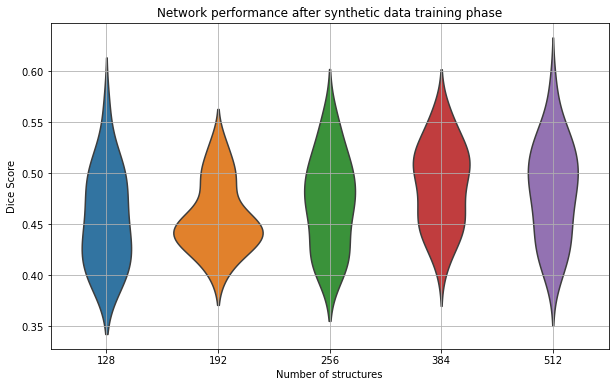

In [127]:
fig = plt.figure(figsize=(10,6))
ax = sns.violinplot(data=df, x="N_structures", y="exp_f1-score", inner=None)

ax.set_title("Network performance after synthetic data training phase")
ax.set_ylabel("Dice Score")
ax.set_xlabel("Number of structures")
ax.grid()

## Ising model performance

(0.2, 1.0)

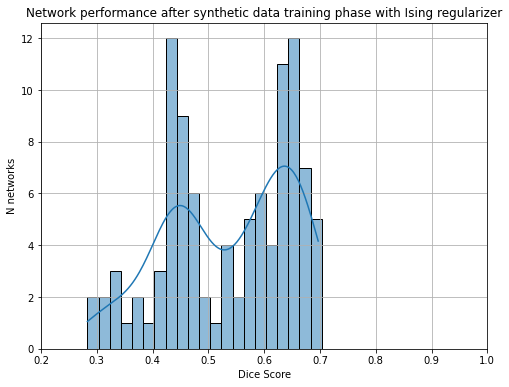

In [6]:
root_dir_base = pathlib.Path("/media/files/segmentation_networks/")
root_dirs = [root_dir_base.joinpath("ising_loss_10_10_2021/")
            ]

root_dirs = [folder.joinpath("trained_models") for folder in root_dirs]
model_folders = [[x for x in listfiles(r) if x.is_dir()] for r in root_dirs]
model_folders = reduce(lambda x,y: x+y, model_folders)

## load all the god dan' metadata from the networks
metadata_list = []

for folder in model_folders:
    model_metadata = read_metadata(folder.joinpath("metadata.json"))    
    model_id = re.search("[0-9]+_[0-9]+", str(folder).rsplit("/")[-1])[0]
    model_metadata["ID"] = model_id
    metadata_list.append(model_metadata)
        
df = pd.DataFrame(metadata_list)
df = pd.concat([df, pd.DataFrame(df['schedule'].to_list(), columns = ['schedule_rate', 'schedule_timing'])], axis=1)

fig = plt.figure(figsize=(8,6))
ax = sns.histplot(data=df, x="exp_f1-score", binwidth=0.02, kde=True)

ax.set_title("Network performance after synthetic data training phase with Ising regularizer")
ax.set_ylabel("N networks")
ax.set_xlabel("Dice Score")
ax.grid()
ax.set_xlim([0.2, 1.0])

In [9]:
df["loss_function"]

0     [cce_dice_loss, ising_loss_low_T]
1     [cce_dice_loss, ising_loss_low_T]
2     [cce_dice_loss, ising_loss_low_T]
3     [cce_dice_loss, ising_loss_low_T]
4     [cce_dice_loss, ising_loss_low_T]
                    ...                
95    [cce_dice_loss, ising_loss_low_T]
96    [cce_dice_loss, ising_loss_low_T]
97    [cce_dice_loss, ising_loss_low_T]
98    [cce_dice_loss, ising_loss_low_T]
99    [cce_dice_loss, ising_loss_low_T]
Name: loss_function, Length: 100, dtype: object

# Transfer learning stage

In [59]:
root_dir_base = pathlib.Path("/media/files/segmentation_networks/")
root_dirs = [root_dir_base.joinpath("transfer_learning_10_18_2021"),
            root_dir_base.joinpath("transfer_learning_10_21_2021"),
            root_dir_base.joinpath("transfer_learning_11_17_2021"),
            root_dir_base.joinpath("transfer_learning_12_2_2021")
            ]

root_dirs = [folder.joinpath("trained_models") for folder in root_dirs]
model_folders = [[x for x in listfiles(r) if x.is_dir()] for r in root_dirs]
model_folders = reduce(lambda x,y: x+y, model_folders)


In [75]:
## load all the god dan' metadata from the networks
metadata_list = []

for folder in model_folders:
    model_metadata = read_metadata(folder.joinpath("metadata.json"))

    if "loss_function" in model_metadata.keys():
        if len(model_metadata["loss_function"]) > 1:
            continue
    
    history_path = "sm_unet_transferLearnWeights_" + model_metadata["backbone"]+"_history.h5"
    history_dict = read_training_history(folder.joinpath(history_path))
    model_metadata.update(history_dict)
    
    model_id = re.search("[0-9]+_[0-9]+", str(folder).rsplit("/")[-1])[0]
    model_metadata["ID"] = model_id
    model_metadata["best_val_f1"] = history_dict["val_f1-score"][np.argmin(history_dict["val_loss"])]
    metadata_list.append(model_metadata)
        
df = pd.DataFrame(metadata_list)
df = pd.concat([df, pd.DataFrame(df['schedule'].to_list(), columns = ['schedule_rate', 'schedule_timing'])], axis=1)

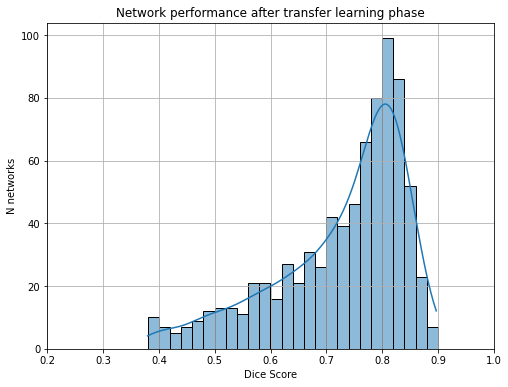

In [77]:
fig = plt.figure(figsize=(8,6))
ax = sns.histplot(data=df[df["expt_val_split"].isin([0.4, 0.5, 0.6])], x="best_val_f1", binwidth=0.02, kde=True)

ax.set_title("Network performance after transfer learning phase")
ax.set_ylabel("N networks")
ax.set_xlabel("Dice Score")
ax.set_xlim([0.2, 1.0])
ax.grid()

## Varying noise level
Using baseline datasets

In [80]:
root_dir_base = pathlib.Path("/media/files/segmentation_networks/")
root_dirs = [root_dir_base.joinpath("transfer_learning_10_18_2021"),
            ]

root_dirs = [folder.joinpath("trained_models") for folder in root_dirs]
model_folders = [[x for x in listfiles(r) if x.is_dir()] for r in root_dirs]
model_folders = reduce(lambda x,y: x+y, model_folders)

## load all the god dan' metadata from the networks
metadata_list = []

for folder in model_folders:
    model_metadata = read_metadata(folder.joinpath("metadata.json"))

    if "loss_function" in model_metadata.keys():
        if len(model_metadata["loss_function"]) > 1:
            continue
    
    history_path = "sm_unet_transferLearnWeights_" + model_metadata["backbone"]+"_history.h5"
    history_dict = read_training_history(folder.joinpath(history_path))
    model_metadata.update(history_dict)
    
    model_id = re.search("[0-9]+_[0-9]+", str(folder).rsplit("/")[-1])[0]
    model_metadata["ID"] = model_id
    model_metadata["best_val_f1"] = history_dict["val_f1-score"][np.argmin(history_dict["val_loss"])]
    metadata_list.append(model_metadata)
        
df = pd.DataFrame(metadata_list)
df = pd.concat([df, pd.DataFrame(df['schedule'].to_list(), columns = ['schedule_rate', 'schedule_timing'])], axis=1)

In [90]:
df["best_val_f1"].max()

0.8908066749572754

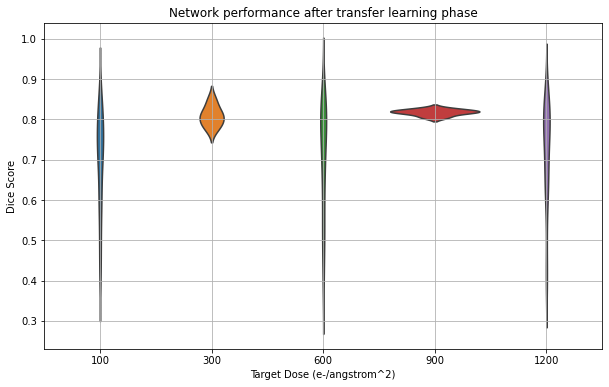

In [96]:
fig = plt.figure(figsize=(10,6))
ax = sns.violinplot(data=df[df["expt_val_split"].isin([0.4, 0.5, 0.6])], x="target_dose", y="best_val_f1", inner=None)

ax.set_title("Network performance after transfer learning phase")
ax.set_ylabel("Dice Score")
ax.set_xlabel("Target Dose (e-/angstrom^2)")
ax.grid()

# Varying NP size


In [105]:
root_dir_base = pathlib.Path("/media/files/segmentation_networks/")
root_dirs = [root_dir_base.joinpath("transfer_learning_10_18_2021"),
            root_dir_base.joinpath("transfer_learning_10_21_2021"),
            root_dir_base.joinpath("transfer_learning_11_17_2021"),
            root_dir_base.joinpath("transfer_learning_12_2_2021")
            ]

root_dirs = [folder.joinpath("trained_models") for folder in root_dirs]
model_folders = [[x for x in listfiles(r) if x.is_dir()] for r in root_dirs]
model_folders = reduce(lambda x,y: x+y, model_folders)

## load all the god dan' metadata from the networks
metadata_list = []

for folder in model_folders:
    model_metadata = read_metadata(folder.joinpath("metadata.json"))

    if "loss_function" in model_metadata.keys():
        if len(model_metadata["loss_function"]) > 1:
            continue
    
    if "transfer_learning_12_2_2021" in str(folder):
        if "substrate_thickness" in model_metadata.keys():
            model_metadata["small_NP"] = False
        else:
            model_metadata["small_NP"] = True
    else:
        model_metadata["small_NP"] = False
    history_path = "sm_unet_transferLearnWeights_" + model_metadata["backbone"]+"_history.h5"
    history_dict = read_training_history(folder.joinpath(history_path))
    model_metadata.update(history_dict)
    
    model_id = re.search("[0-9]+_[0-9]+", str(folder).rsplit("/")[-1])[0]
    model_metadata["ID"] = model_id
    model_metadata["best_val_f1"] = history_dict["val_f1-score"][np.argmin(history_dict["val_loss"])]
    metadata_list.append(model_metadata)
        
df = pd.DataFrame(metadata_list)
df = pd.concat([df, pd.DataFrame(df['schedule'].to_list(), columns = ['schedule_rate', 'schedule_timing'])], axis=1)

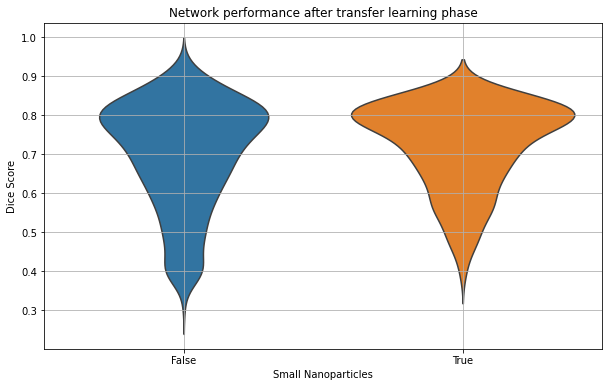

In [106]:
fig = plt.figure(figsize=(10,6))
ax = sns.violinplot(data=df, x="small_NP", y="best_val_f1", inner=None)

ax.set_title("Network performance after transfer learning phase")
ax.set_ylabel("Dice Score")
ax.set_xlabel("Small Nanoparticles")
ax.grid()

## Substrate Thicknesses

In [117]:
root_dir_base = pathlib.Path("/media/files/segmentation_networks/")
root_dirs = [root_dir_base.joinpath("transfer_learning_12_2_2021")
            ]

root_dirs = [folder.joinpath("trained_models") for folder in root_dirs]
model_folders = [[x for x in listfiles(r) if x.is_dir()] for r in root_dirs]
model_folders = reduce(lambda x,y: x+y, model_folders)

## load all the god dan' metadata from the networks
metadata_list = []

for folder in model_folders:
    model_metadata = read_metadata(folder.joinpath("metadata.json"))


    if "substrate_thicknesses" not in model_metadata.keys():
        continue
    
    history_path = "sm_unet_transferLearnWeights_" + model_metadata["backbone"]+"_history.h5"
    history_dict = read_training_history(folder.joinpath(history_path))
    model_metadata.update(history_dict)
    
    model_id = re.search("[0-9]+_[0-9]+", str(folder).rsplit("/")[-1])[0]
    model_metadata["ID"] = model_id
    model_metadata["best_val_f1"] = history_dict["val_f1-score"][np.argmin(history_dict["val_loss"])]
    metadata_list.append(model_metadata)
        
df = pd.DataFrame(metadata_list)
df = pd.concat([df, pd.DataFrame(df['schedule'].to_list(), columns = ['schedule_rate', 'schedule_timing'])], axis=1)

In [118]:
df["substrate_thicknesses_processed"] = df["substrate_thicknesses"].apply(lambda x: len(x))

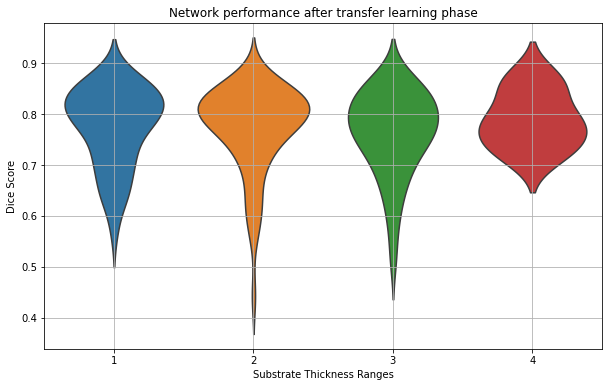

In [119]:
fig = plt.figure(figsize=(10,6))
ax = sns.violinplot(data=df, x="substrate_thicknesses_processed", y="best_val_f1", inner=None)

ax.set_title("Network performance after transfer learning phase")
ax.set_ylabel("Dice Score")
ax.set_xlabel("Substrate Thickness Ranges")
ax.grid()

# Structural and Focal augmentation

In [120]:
root_dir_base = pathlib.Path("/media/files/segmentation_networks/")
root_dirs = [root_dir_base.joinpath("transfer_learning_12_2_2021")
            ]

root_dirs = [folder.joinpath("trained_models") for folder in root_dirs]
model_folders = [[x for x in listfiles(r) if x.is_dir()] for r in root_dirs]
model_folders = reduce(lambda x,y: x+y, model_folders)

## load all the god dan' metadata from the networks
metadata_list = []

for folder in model_folders:
    model_metadata = read_metadata(folder.joinpath("metadata.json"))


    if "substrate_thicknesses" in model_metadata.keys():
        continue
    
    history_path = "sm_unet_transferLearnWeights_" + model_metadata["backbone"]+"_history.h5"
    history_dict = read_training_history(folder.joinpath(history_path))
    model_metadata.update(history_dict)
    
    model_id = re.search("[0-9]+_[0-9]+", str(folder).rsplit("/")[-1])[0]
    model_metadata["ID"] = model_id
    model_metadata["best_val_f1"] = history_dict["val_f1-score"][np.argmin(history_dict["val_loss"])]
    metadata_list.append(model_metadata)
        
df = pd.DataFrame(metadata_list)
df = pd.concat([df, pd.DataFrame(df['schedule'].to_list(), columns = ['schedule_rate', 'schedule_timing'])], axis=1)

In [122]:
df.columns

Index(['N_defocus', 'N_structures', 'alpha_0', 'backbone', 'batch_size',
       'expt_generator_seed', 'expt_val_split', 'schedule', 'seed',
       'target_dose', 'f1-score', 'iou_score', 'loss', 'lr', 'val_f1-score',
       'val_iou_score', 'val_loss', 'ID', 'best_val_f1', 'schedule_rate',
       'schedule_timing'],
      dtype='object')

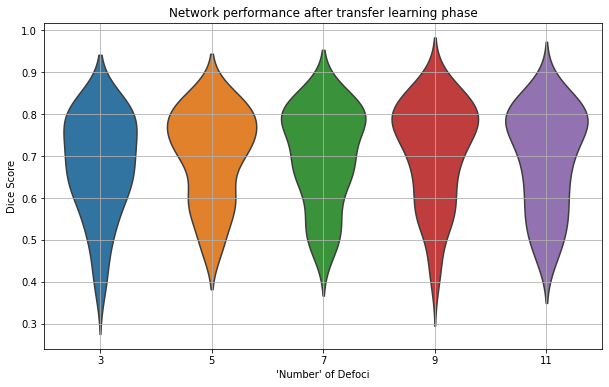

In [123]:
fig = plt.figure(figsize=(10,6))
ax = sns.violinplot(data=df, x="N_defocus", y="best_val_f1", inner=None)

ax.set_title("Network performance after transfer learning phase")
ax.set_ylabel("Dice Score")
ax.set_xlabel("'Number' of Defoci")
ax.grid()

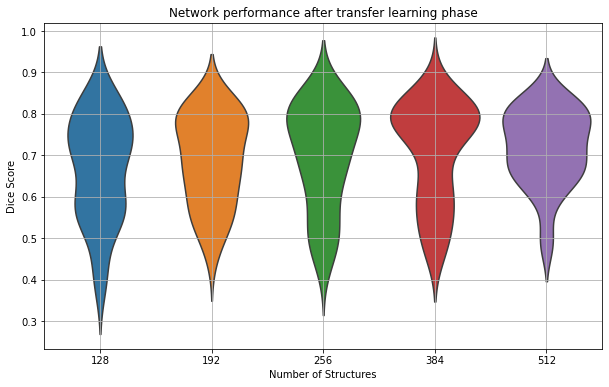

In [125]:
fig = plt.figure(figsize=(10,6))
ax = sns.violinplot(data=df, x="N_structures", y="best_val_f1", inner=None)

ax.set_title("Network performance after transfer learning phase")
ax.set_ylabel("Dice Score")
ax.set_xlabel("Number of Structures")
ax.grid()